##### 1. IMPORT LIBRERIES

In [135]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3

##### 2. DF: TRAIN AND TEST

In [136]:
train_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/cpu-train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/cpu-test.csv')


In [137]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  600 non-null    object 
 1   cpu       600 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


##### 3.  IN TRAIN DATA: COLUMN DATE TIME: NOW IS INDEX AND DATETIME OBJECT.

In [138]:
train_data["datetime"] = pd.to_datetime(train_data.datetime)
train_data = train_data.set_index("datetime")
ts_train = train_data["cpu"]
ts_train.head()

datetime
2017-01-27 18:42:00    1.14
2017-01-27 18:43:00    1.10
2017-01-27 18:44:00    1.09
2017-01-27 18:45:00    1.08
2017-01-27 18:46:00    1.08
Name: cpu, dtype: float64

##### 4.  IN TEST DATA: COLUMN DATE TIME: NOW IS INDEX AND DATETIME OBJECT.

In [139]:
test_data["datetime"] = pd.to_datetime(test_data.datetime)
test_data = test_data.set_index("datetime")
ts_test = test_data["cpu"]
ts_test.head()

datetime
2017-01-28 04:42:00    1.71
2017-01-28 04:43:00    1.58
2017-01-28 04:44:00    1.86
2017-01-28 04:45:00    1.66
2017-01-28 04:46:00    1.61
Name: cpu, dtype: float64

##### 5. PLOT TRAIN AND TEST DATA

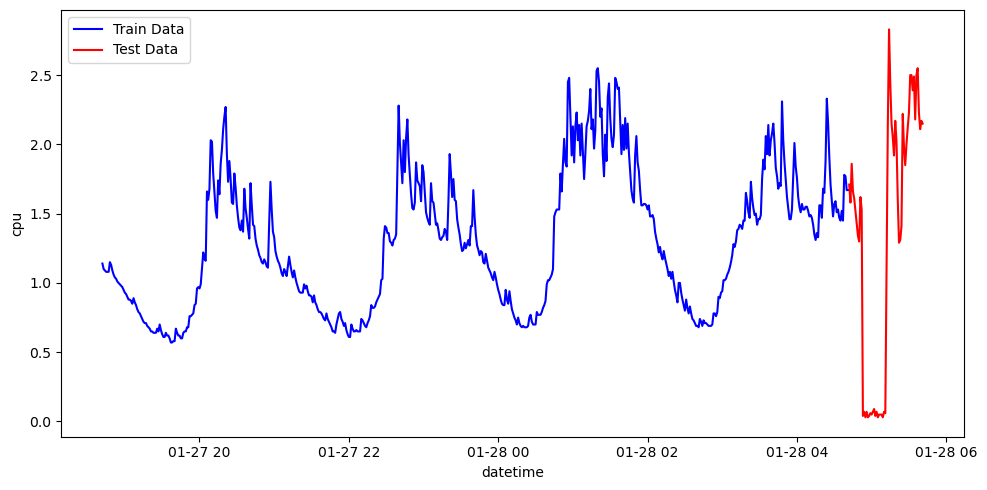

In [140]:
fig, axis = plt.subplots(figsize=(10, 5))

sns.lineplot(data=train_data["cpu"], color="blue", label="Train Data")
sns.lineplot(data=test_data["cpu"], color="red", label="Test Data")
plt.tight_layout()

plt.legend() 
plt.show()

##### 6. DISASSEMBLY OF TIME SERIES

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train_data, period = 12)
decomposition

##### .7 TRAIN DATA: ORIGINAL TIME SERIES / TREND: THE EXTRACTED TREND 

* Grafico de Tendencia

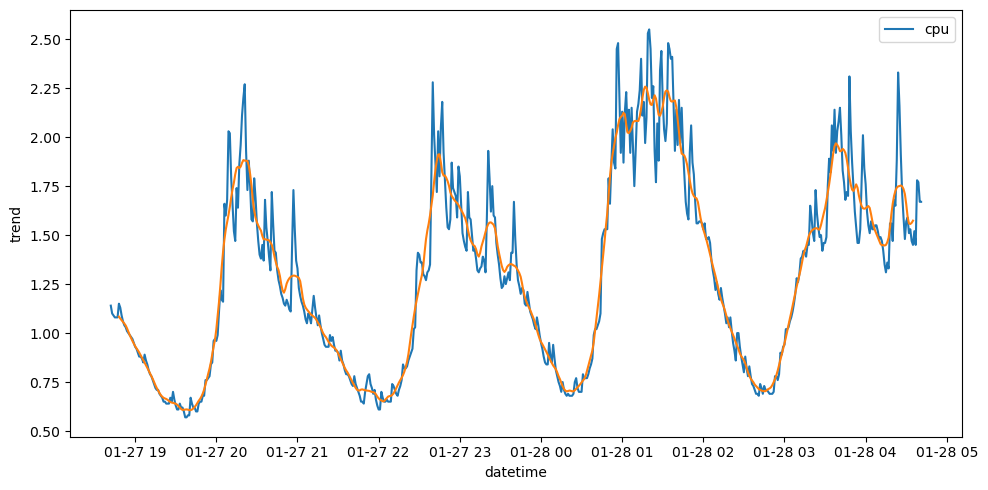

In [142]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = train_data)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

##### .8 TRAIN DATA: ORIGINAL TIME SERIES / SEASONAL

* Grafico de Estacionalidad

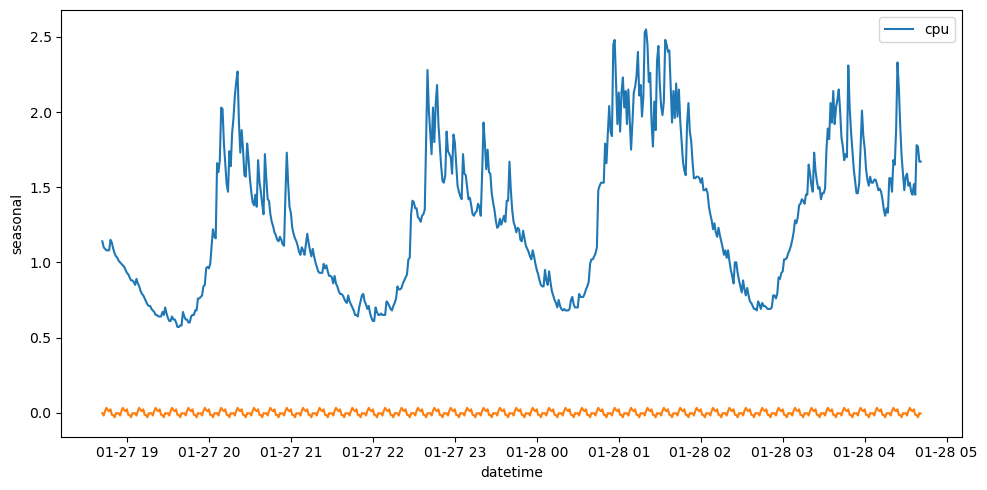

In [143]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = train_data)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

##### 9. ADF: DICKEY FULLER (2 CODES, DIFERENTS RESULTS)

* It is used to determine if a time series is stationary or not.

* In summary, in both sets of results, the p-values ​​are very small and the test statistic is less than the critical values. This indicates that the two time series are stationary by the Augmented Dickey-Fuller test, which implies that they do not have a significant trend and are easier to model and analyze.

In [144]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(train_data)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                  -3.421625
p-value                          0.010243
#Lags Used                      18.000000
Number of Observations Used    581.000000
Critical Value (1%)             -3.441655
Critical Value (5%)             -2.866527
Critical Value (10%)            -2.569426
dtype: float64

In [145]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Supongamos que tu serie de tiempo diferenciada se llama "ts_stationary"

# Realiza el ADF test en la serie de tiempo diferenciada para verificar si es estacionaria
adf_test_result = adfuller(ts_stationary)

print("ADF Test Result:")
print("Test Statistic: ", adf_test_result[0])
print("p-value: ", adf_test_result[1])
print("#Lags Used: ", adf_test_result[2])
print("Number of Observations Used: ", adf_test_result[3])
print("Critical Values:")
for key, value in adf_test_result[4].items():
    print(f"{key}: {value}")

ADF Test Result:
Test Statistic:  -13.977891122062687
p-value:  4.229154256697077e-26
#Lags Used:  4
Number of Observations Used:  594
Critical Values:
1%: -3.441406876071572
5%: -2.866418015869717
10%: -2.5693678601956718


##### 10. TRAIN DATA: ORIGINAL TIME SERIES / RESIDUAL

* part of the series that cannot be explained by trend or seasonality

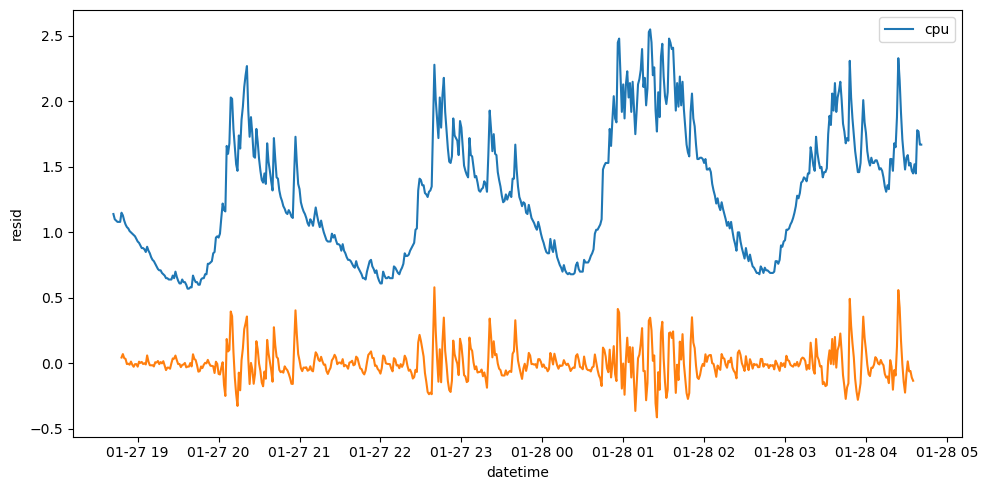

In [146]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = train_data)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

##### 11. ACF: autocorrelation function

* important tool in time series analysis to identify autocorrelation patterns in data

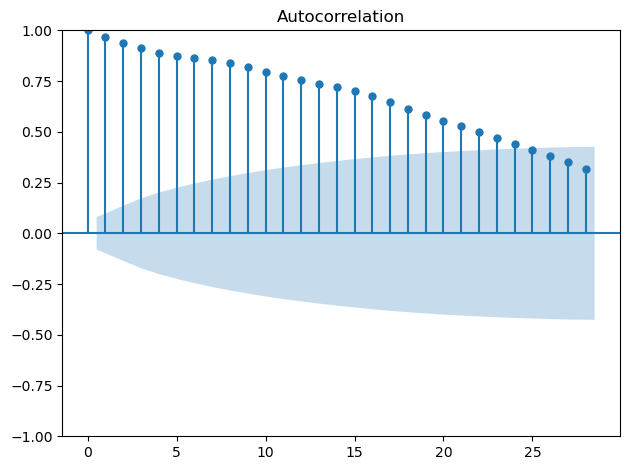

In [147]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train_data)

plt.tight_layout()

plt.show()

##### 12. DIFFERENCE BETWEEN SUCCESSIVE OBSERVATIONS OF THE TIME SERIES

In [148]:
ts_stationary = train_data.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -1.397789e+01
p-value                        4.229154e-26
#Lags Used                     4.000000e+00
Number of Observations Used    5.940000e+02
Critical Value (1%)           -3.441407e+00
Critical Value (5%)           -2.866418e+00
Critical Value (10%)          -2.569368e+00
dtype: float64

##### 13. ARIMA (AutoRegressive Integrated Moving Average)

In [149]:
from pmdarima import auto_arima

model = auto_arima(ts_stationary, seasonal = True, trace = True, m = 24)

print("Orden ARIMA:", model.order)
print("Orden Estacional:", model.seasonal_order)
print("AIC:", model.aic())
print("BIC:", model.bic())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=3.47 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-812.814, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-809.989, Time=0.54 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-810.139, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=-814.783, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=-811.059, Time=0.32 sec
 ARIMA(0,0,0)(0,0,1)[24] intercept   : AIC=-811.046, Time=0.53 sec
 ARIMA(0,0,0)(1,0,1)[24] intercept   : AIC=-809.013, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=-811.743, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=-811.910, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=inf, Time=0.49 sec

Best model:  ARIMA(0,0,0)(0,0,0)[24]          
Total fit time: 6.458 seconds
Orden ARIMA: (0, 0, 0)
Orden Estacional: (0, 0, 0, 24)
AIC: -814.7825610541995
BIC: -810.3872994560841


In [150]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  599
Model:                        SARIMAX   Log Likelihood                 408.391
Date:                Sat, 12 Aug 2023   AIC                           -814.783
Time:                        11:42:12   BIC                           -810.387
Sample:                    01-27-2017   HQIC                          -813.071
                         - 01-28-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0150      0.000     30.648      0.000       0.014       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):               611.96
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               1.97   Skew:                             1.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### 14. FUTURE PREDICT USING ARIMNA

In [151]:
forecast = model.predict(10)
forecast

2017-01-28 04:42:00    0.0
2017-01-28 04:43:00    0.0
2017-01-28 04:44:00    0.0
2017-01-28 04:45:00    0.0
2017-01-28 04:46:00    0.0
2017-01-28 04:47:00    0.0
2017-01-28 04:48:00    0.0
2017-01-28 04:49:00    0.0
2017-01-28 04:50:00    0.0
2017-01-28 04:51:00    0.0
Freq: T, dtype: float64

##### 15. PLOT 

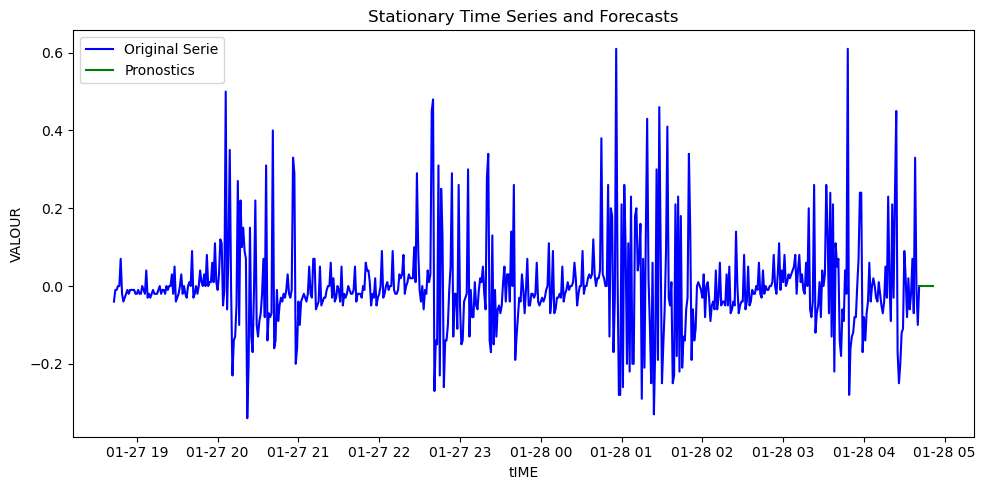

In [152]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(10, 5))

axis.plot(ts_stationary, label='Original Serie', color='blue')

axis.plot(forecast, label='Pronostics', color='green')

axis.set_xlabel('tIME')
axis.set_ylabel('VALOUR')
axis.set_title('Stationary Time Series and Forecasts')
axis.legend()

plt.tight_layout()
plt.show()

##### 16. SAVE MODEL

In [153]:
import pickle
from pmdarima import auto_arima

model = auto_arima(ts_stationary, seasonal=True, m=24)



with open('modelo_arima.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Modelo ARIMA guardado en 'modelo_arima.pkl'")

Modelo ARIMA guardado en 'modelo_arima.pkl'


##### 17. INTERESTING DATA

In [154]:
from IPython.display import HTML

pdf_link = "https://www.ucm.es/data/cont/docs/518-2013-10-25-Tema_6_EctrGrado.pdf"


button_html = f'<a href="{pdf_link}" target="_blank"><button style="padding: 10px; background-color: #4CAF50; color: white; border: none; cursor: pointer;">Accede al contenido</button></a>'


display(HTML(button_html))